베스트 모델 찾은 후 조기종료- 와인 이진분류

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(2022)
tf.random.set_seed(seed)

In [ ]:
from google.colab import files
up = files.upload()
filename = list(up.keys())[0]

Saving wine.csv to wine (2).csv


In [ ]:
df = pd.read_csv(filename, header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In [ ]:
np.unique(df.values[:,-1],return_counts=True)

(array([0., 1.]), array([4898, 1599]))

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.values[:,:-1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.values[:,-1], stratify=df.values[:,-1], random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872,), (1625,))

* 모델 정의/설정

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(30, input_dim=12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 12)                156       
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 931
Trainable params: 931
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

* 모델 저장관련 설정

In [ ]:
import os
if not os.path.exists('model'):
    os.mkdir('model')

In [ ]:
model_path = 'model/best_wine.h5'
# model_path = 'model/wine_{epoch:03d}_{val_loss:.4f}.h5'

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    model_path, monitor='val_loss', verbose=1, save_best_only=True
)

* 조기 종료(자동 중단) 관련 설정

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=20)

* 모델 학습 및 저장

In [ ]:
hist = model.fit(X_train, y_train, validation_split=0.2, verbose=0, 
                 epochs=200, batch_size=200,
                 callbacks=[checkpoint, early_stopping])


Epoch 00001: val_loss improved from inf to 0.60627, saving model to model/best_wine.h5

Epoch 00002: val_loss improved from 0.60627 to 0.46313, saving model to model/best_wine.h5

Epoch 00003: val_loss improved from 0.46313 to 0.31256, saving model to model/best_wine.h5

Epoch 00004: val_loss improved from 0.31256 to 0.19083, saving model to model/best_wine.h5

Epoch 00005: val_loss improved from 0.19083 to 0.11229, saving model to model/best_wine.h5

Epoch 00006: val_loss improved from 0.11229 to 0.07262, saving model to model/best_wine.h5

Epoch 00007: val_loss improved from 0.07262 to 0.05296, saving model to model/best_wine.h5

Epoch 00008: val_loss improved from 0.05296 to 0.04248, saving model to model/best_wine.h5

Epoch 00009: val_loss improved from 0.04248 to 0.03634, saving model to model/best_wine.h5

Epoch 00010: val_loss improved from 0.03634 to 0.03232, saving model to model/best_wine.h5

Epoch 00011: val_loss improved from 0.03232 to 0.02961, saving model to model/best_

* 베스트 모델 로딩한 후 평가

In [ ]:
from tensorflow.keras.models import load_model
best_model_path = 'model/wine_078_0.0108.h5'
best_model = load_model(best_model_path)
best_model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9975


[0.010415297001600266, 0.9975384473800659]

- 학습과정 시각화

In [ ]:
y_acc = hist.history['accuracy'][:200]
y_vloss = hist.history['val_loss'][:200]
xs = np.arange(1,len(y_acc)+1)

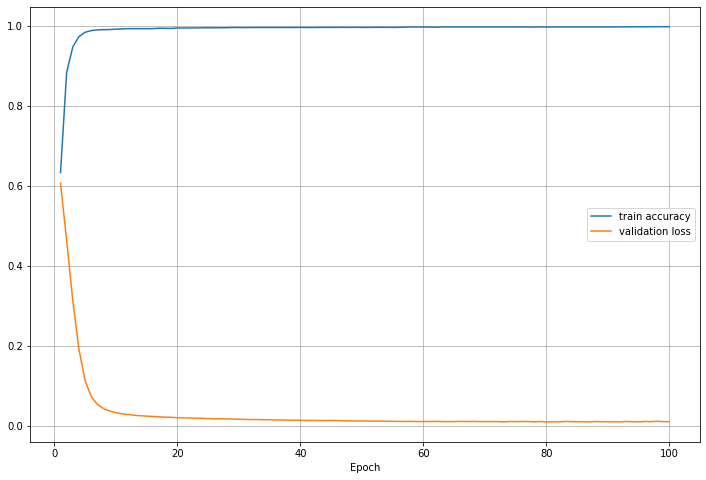

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms =5, label = 'train accuracy')
plt.plot(xs, y_vloss, ms = 5, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()